In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.spatial import ConvexHull
import pandas as pd

np.random.seed(20)

In [81]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 200
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

In [82]:
def kmeans_plot(data, labels):
    fig, ax = plt.subplots()

    for i in range(N):
        x = data[labels == i, 0]
        y = data[labels == i, 1]

        ax.scatter(x, y, s=10, alpha=.8)

In [83]:
def concatData(X, labels):
    converted_labels = np.expand_dims(labels, axis=1)
    data = np.concatenate((X, converted_labels), axis=1) 

    return data


def drawGifClustering(data, step, iternum, centroids):
    df = pd.DataFrame(data, columns=['x', 'y', 'label'])
    df['label'] = df['label'].astype('int')
    print(df)
    df['cen_x'] = df.label.map({0:centroids[0][0], 1:centroids[1][0], 2:centroids[2][0]})
    df['cen_y'] = df.label.map({0:centroids[0][1], 1:centroids[1][1], 2:centroids[2][1]})
    colors = ['#DF2020', '#81DF20', '#000000']
    plt.figure(figsize=(9,8))

    #draw points
    for i in df.label.unique():
        points = df[df.label == i][['x', 'y']].values
        color = colors[i]
        plt.scatter(points[:, 0], points[:, 1], c=color, s=20, alpha=0.4)

    for i in df.label.unique():
        points = df[df.label == i][['x', 'y']].values
        # get convex hull
        hull = ConvexHull(points)
        # get x and y coordinates
        # repeat last point to close the polygon
        x_hull = np.append(points[hull.vertices,0],
                        points[hull.vertices,0][0])
        y_hull = np.append(points[hull.vertices,1],
                        points[hull.vertices,1][0])
        # plot shape
        plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])
        
    plt.scatter(df.cen_x.unique(), df.cen_y.unique(), c=colors, marker='^', s=100)

    plt.title(f'Iter {iternum}: {step}')
    plt.xlim(-1,11)
    plt.ylim(-1,9)

    name = f'{iternum}_{step}'
    plt.savefig(f'gif_image/{name}.png')

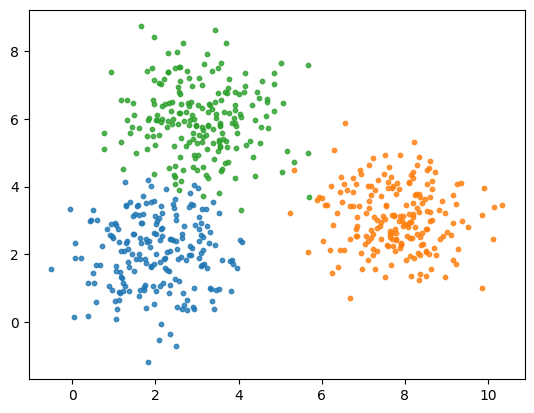

In [84]:
kmeans_plot(X, original_label)

In [85]:
def assign_label(data, centroids):
    D = cdist(data, centroids)
    labels = np.argmin(D, axis=1)

    return labels

def update_centroids(data, labels, centroid_id):
    centroid_points = data[labels == centroid_id, :]
    new_centroid = np.mean(centroid_points, axis=0)
    print(new_centroid)

    return new_centroid

In [86]:
def k_means(data, K, max_it_num=10):
    #init centroids
    centroids = data[np.random.choice(data.shape[0], K, replace=False)]
    labels_hist = []
    it_count = 0

    for _ in range(max_it_num):    
        label = assign_label(data, centroids)
    
        if len(labels_hist) != 0 and (label == labels_hist[-1]).all():
            break

        labels_hist.append(label)

        for centroid_id in range(K):
            centroids[centroid_id] = update_centroids(data, label, centroid_id)

        it_count += 1
    
    return (it_count, labels_hist[-1], centroids)

In [87]:
(n, labels, centroids) = k_means(X, 3)

print(n)
print(centroids)

[7.77341478 3.11780692]
[2.97447181 4.93857083]
[1.45576128 1.65462499]
[7.79389377 3.07849771]
[3.02300918 5.71675405]
[1.95417568 1.82290948]
[7.79389377 3.07849771]
[3.0507843  5.92075446]
[2.02406974 1.9672676 ]
[7.79389377 3.07849771]
[3.07079571 5.99276886]
[2.03999335 2.03362524]
[7.79389377 3.07849771]
[3.07710524 6.00181624]
[2.03887496 2.04436512]
5
[[7.79389377 3.07849771]
 [3.07710524 6.00181624]
 [2.03887496 2.04436512]]


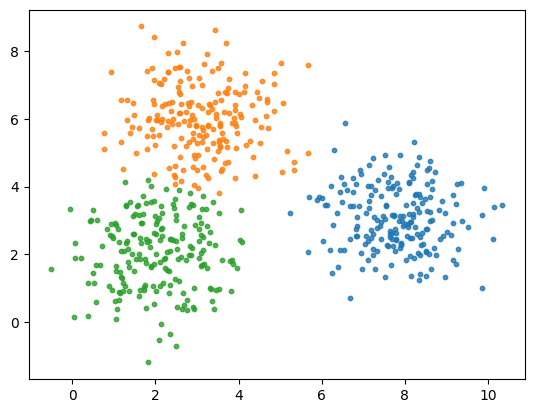

In [88]:
kmeans_plot(X, labels)

(-1.0, 9.0)

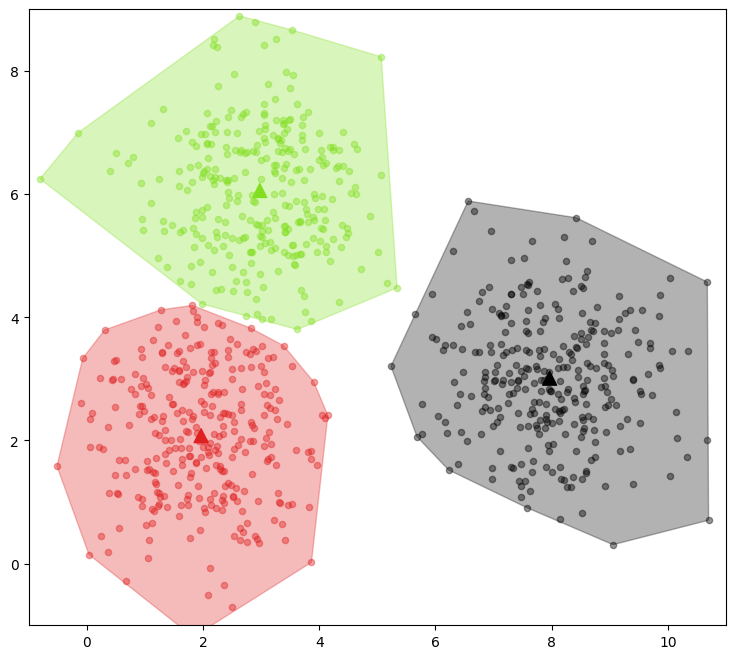

In [34]:
from scipy.spatial import ConvexHull
import pandas as pd

def concatData(X, labels):
    converted_labels = np.expand_dims(labels, axis=1)
    data = np.concatenate((X, converted_labels), axis=1) 

    return data


def drawGifClustering(data, step, iternum,):
    df = pd.DataFrame(data, columns=['x', 'y', 'label'])
    df['label'] = df['label'].astype('int')
    df['cen_x'] = df.label.map({0:centroids[0][0], 1:centroids[1][0], 2:centroids[2][0]})
    df['cen_y'] = df.label.map({0:centroids[0][1], 1:centroids[1][1], 2:centroids[2][1]})
    colors = ['#DF2020', '#81DF20', '#000000']
    points = df[df.label == i][['x', 'y']].values
    plt.figure(figsize=(9,8))

    #draw points
    for i in df.label.unique():
        color = colors[i]
        plt.scatter(points[:, 0], points[:, 1], c=color, s=20, alpha=0.4)

    for i in df.label.unique():
        # get convex hull
        hull = ConvexHull(points)
        # get x and y coordinates
        # repeat last point to close the polygon
        x_hull = np.append(points[hull.vertices,0],
                        points[hull.vertices,0][0])
        y_hull = np.append(points[hull.vertices,1],
                        points[hull.vertices,1][0])
        # plot shape
        plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])
        
    plt.scatter(df.cen_x.unique(), df.cen_y.unique(), c=colors, marker='^', s=100)

    plt.title(f'Iter {iternum}: {step}')
    plt.xlim(-1,11)
    plt.ylim(-1,9)

In [30]:
df[df.label == 0][['x', 'y']].values[:, 0]

array([ 2.88389311,  2.35753652,  0.91516741,  2.93946935,  2.50309684,
        2.32346101,  1.20798321,  0.72049734,  1.9558052 ,  3.05110868,
        1.8313539 ,  3.12013226,  1.75666123,  1.89098263,  2.12877835,
        1.11450685,  1.06506204,  2.52706972,  2.32961334,  1.6615094 ,
        1.39769198,  2.64703408,  2.4380245 ,  3.20451128,  2.49343724,
        1.4448142 ,  2.85709382,  1.78033888,  0.51761495,  1.17130723,
        2.52772847,  3.3014294 ,  4.09466534,  2.69100212,  2.09878861,
        1.14522451,  1.03778402,  1.76053024,  2.64643017,  2.03819247,
        2.14362263,  1.59042857,  1.59546598,  1.06108951,  3.09543335,
        0.55815143,  0.37049848,  0.943831  ,  1.04998199,  1.46792075,
        2.21865772,  1.77130273,  2.16583301,  0.03810776,  3.09188661,
        1.28821444,  2.75231332,  2.67663967,  1.63494256,  2.28955915,
        3.60599264,  0.21383137,  3.53764397,  1.89418695,  2.01123134,
        0.48548903,  2.84162252,  2.82518462,  2.33812635,  2.34